<table class="ee-notebook-buttons" align="center">
    <td><a target="_blank"  href="https://colab.research.google.com/github/ytarazona/scikit-eo/blob/main/examples/11_Atmospheric_Correction.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in Google Colab</a></td>
</table>

# **_<div class="alert alert-success"><font color='darkred'> Tutorials: 11 Atmospheric Correction</font></div>_**

# 1.0 Libraries

To install ```scikit-eo``` and ```rasterio``` you can do it with the following line:

In [ ]:
!pip install scikeo rasterio

In [ ]:
import rasterio
from scikeo.atmosCorr import atmosCorr as ac
from scikeo.writeRaster import writeRaster as wr
import matplotlib.pyplot as plt
import numpy as np

Connecting to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 2.0 Optical image

The image to be used can be downloaded [here](https://drive.google.com/drive/folders/1DpPBEitgVkvOLQpnGabVMRQQTmp0q1J3?usp=sharing):

In [ ]:
inst = ac(path = r'C:\Users\Usuario\Downloads\LC08_L1TP_232066_20210716_20210729_02_T1')

## 3.0 Results

Calculating TOA reflectance:

In [ ]:
toa = inst.TOA()

Calculating Surface Reflectance with *Dark Object Substract*:

In [ ]:
dos = inst.DOS()

Stacking three bands, i.e. swir1, nir and red.

In [ ]:
# toa reflectance
rgb_toa = np.stack([toa[:,:,4], toa[:,:,3], toa[:,:,2]], axis = -1)

# surface reflectance
rgb_dos = np.stack([dos[:,:,4], dos[:,:,3], dos[:,:,2]], axis = -1)

Histogram enhancement

In [ ]:
# Normalizing bands
def stretch_std(arr, std_val):
    """ Returns the data with a standard deviation contrast applied """
    mean = np.nanmean(arr)
    std = np.nanstd(arr)*std_val
    min_val = np.nanmax([mean - std, np.nanmin(arr)])
    max_val = np.nanmin([mean + std, np.nanmax(arr)])
    clipped_arr = np.clip(arr, min_val, max_val)
    img = (clipped_arr - min_val)/(max_val - min_val)
    return img

rgb_toa = stretch_std(rgb_toa, 2)

rgb_dos = stretch_std(rgb_dos, 2)

Finally, let´s both plot the image with TOA values and SR values.

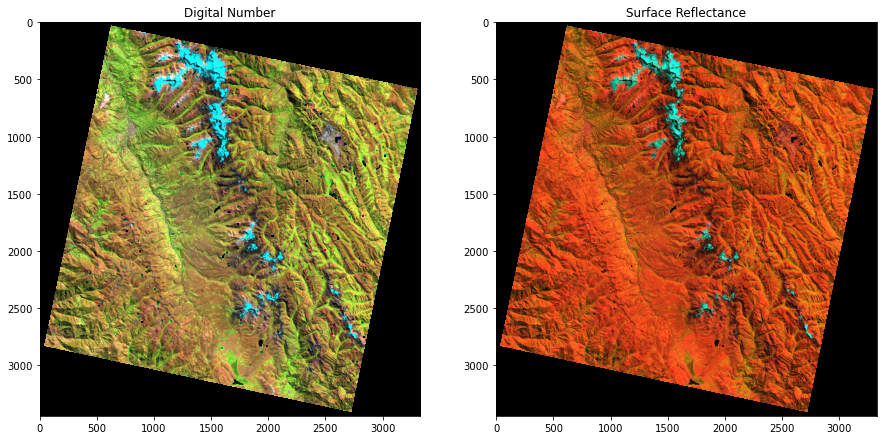

In [ ]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 9))

axes[0].imshow(rgb_toa)
axes[0].set_title("TOA Reflectance")
axes[0].grid(False)

axes[1].imshow(rgb_dos)
axes[1].set_title("Surface Reflectance")
axes[1].grid(False)